# Journey for Policy Makers
Econ-ARK is a powerful toolbox to solve heterogeneous agent models. Users can run off-the shelf models or use tools to build their own agent or model type. While there are many notebooks which introduce and describe different agents and tools it might be overwhelming at first.

This guide tries to introduce HARK and point out the most important notebooks, model types, and tools such that users can get quickly up to speed to analyze macroeconomic shocks. For this, we will:

1. Introduction into HARK
2. HARK meets SSJ
3. Why use HARK?

Author: Adrian Monninger

## 1. Introduction into HARK

Heterogenous Agents Resources & toolKit (HARK) is a toolkit for the structural modeling of economic choices of optimizing and non-optimizing heterogeneous agents.

The open-source project [Econ-ark](https://github.com/econ-ark) contains the three main repositories [HARK](https://github.com/econ-ark/HARK), [DemARK](https://github.com/econ-ark/DemARK), and [RemARK](https://github.com/econ-ark/RemARK). On top of that, there is a [website](https://econ-ark.org/) and an [online documentation](https://hark.readthedocs.io/en/latest/) with useful descriptions and references to specific notebooks.

- HARK: Includes the source code as well as some example notebooks.
- DemARK: Demonstrations of tools, AgentTypes, and ModelClasses.
- RemARK: R[eplications/eproductions] and Explorations Made using ARK.
    - [The distribution of wealth and the marginal propensity to consume](https://github.com/econ-ark/REMARK/blob/master/REMARKs/cstwMPC.md)
    - [Lifecycle and Portfolio choice](https://github.com/econ-ark/REMARK/blob/master/REMARKs/CGMPortfolio.md)
    - ...

## 1.1 Structure
Econ-ark has two types of classes. One for the micro level called: `AgentType` and one for the macro level called: `Market`. Today, we will focus on the AgentType and use the sequence space toolbox for the macro level.

To understand the microeconomic models in HARK, you need to have some concept of the Agent-type class structure. In HARK more advanced models are subclasses of the more primitive ones. The diagram, illustrates this structure: the deterministic class `PerfForesightConsumerType`, is then a parent for the class of the consumers with idiosyncratic income shocks `IndShockConsumerType`. Next there is a class with the idiosyncratic and aggregate income shocks `𝙼𝚊𝚛𝚔𝚘𝚟ConsumerType`. However, it is not the end! There are subclass of the `AggShockConsumerType` which are designed to be integrated with the macroeconomic models, as well as there are many other subclasses.

![HARK structure](HARK_struct_2.png)

## 1.2 Example: `IndShockConsumerType`
The `IndShockConsumerType` is our standard consumer that faces idiosyncratic permanent and transitory shocks. Other shocks can be added by changing parameters (unemployment, retirement).

The object-oriented programming language makes it extremely easy to [use](https://github.com/econ-ark/HARK/blob/master/examples/ConsIndShockModel/IndShockConsumerType.ipynb). A small illustration is below solving an infinite horizon and lifecycle problem.

In [1]:
from HARK.ConsumptionSaving.ConsIndShockModel import IndShockConsumerType
from HARK.utilities import plot_funcs_der, plot_funcs
import matplotlib.pyplot as plt
import numpy as np

### An infinite horizon Problem

In [2]:
# Specify a dictionary
IdiosyncDict={
    # Parameters shared with the perfect foresight model
    "CRRA": 2.0,                           # Coefficient of relative risk aversion
    "Rfree": 1.03,                         # Interest factor on assets
    "DiscFac": 0.96,                       # Intertemporal discount factor
    "LivPrb" : [0.99,0.9,0.8,0.7,0.6,0.5,0.4,0.3,0.2,0.1],
    "PermGroFac" : [1.01,1.01,1.01,1.02,1.02,1.02,0.7,1.0,1.0,1.0],
    
    # Parameters that specify the income distribution over the lifecycle
    "PermShkStd" : [0.1,0.2,0.1,0.2,0.1,0.2,0.1,0,0,0],
    "PermShkCount" : 7,                    # Number of points in discrete approximation to permanent income shocks
    "TranShkStd" : [0.3,0.2,0.1,0.3,0.2,0.1,0.3,0,0,0],
    "TranShkCount" : 7,                    # Number of points in discrete approximation to transitory income shocks
    "UnempPrb" : 0.05,                     # Probability of unemployment while working
    "IncUnemp" : 0.3,                      # Unemployment benefits replacement rate
    "UnempPrbRet" : 0.0005,                # Probability of "unemployment" while retired
    "IncUnempRet" : 0.0,                   # "Unemployment" benefits when retired
    "T_retire" : 7,                        # Period of retirement (0 --> no retirement)
    "tax_rate" : 0.0,                      # Flat income tax rate (legacy parameter, will be removed in future)
    
    # Parameters for constructing the "assets above minimum" grid
    "aXtraMin" : 0.001,                    # Minimum end-of-period "assets above minimum" value
    "aXtraMax" : 20,                       # Maximum end-of-period "assets above minimum" value
    "aXtraCount" : 48,                     # Number of points in the base grid of "assets above minimum"
    "aXtraNestFac" : 3,                    # Exponential nesting factor when constructing "assets above minimum" grid
    "aXtraExtra" : [None],                 # Additional values to add to aXtraGrid
    
    # A few other paramaters
    "BoroCnstArt" : 0.0,                   # Artificial borrowing constraint; imposed minimum level of end-of period assets
    "vFuncBool" : True,                    # Whether to calculate the value function during solution   
    "CubicBool" : False,                   # Preference shocks currently only compatible with linear cFunc
    "T_cycle" : 10,                        # Number of periods in the cycle for this agent type        
    

    # Parameters only used in simulation
    "AgentCount" : 5000,                 # Number of agents of this type
    "T_sim" : 1000,                       # Number of periods to simulate
    "aNrmInitMean" :np.log(0.0),# Mean of log initial assets , 
    # The value of np.log(0.0) causes the code to ensure newborns have have exactly 1.0 in market resources.
    
    # Mean of log initial assets
    "aNrmInitStd"  : 0.0,                 # Standard deviation of log initial assets
    "pLvlInitMean" : 0.0,                  # Mean of log initial permanent income
    "pLvlInitStd"  : 0.0,                  # Standard deviation of log initial permanent income
    "PermGroFacAgg" : 1.0,                 # Aggregate permanent income growth factor
    "T_age" : None,                        # Age after which simulated agents are automatically killed
}

<ipython-input-2-7d06e5625ef8>:39: RuntimeWarning: divide by zero encountered in log
  "aNrmInitMean" :np.log(0.0),# Mean of log initial assets ,


In [3]:
# Specify agent
IndShockExample_inf = IndShockConsumerType(**IdiosyncDict)
IndShockExample_inf.cycles = 0 # Make this type have an infinite horizon

In [4]:
# Solve
IndShockExample_inf.solve()

Consumption function for an idiosyncratic shocks consumer type:


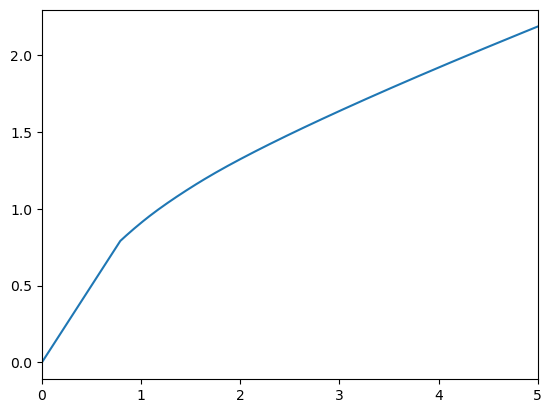

Marginal propensity to consume for an idiosyncratic shocks consumer type:


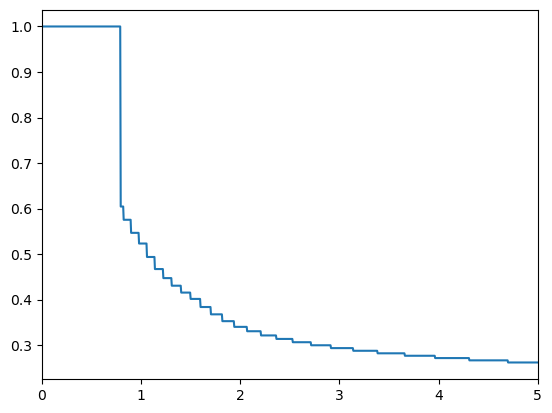

In [5]:
# Show
print('Consumption function for an idiosyncratic shocks consumer type:')
plot_funcs(IndShockExample_inf.solution[0].cFunc, IndShockExample_inf.solution[0].mNrmMin,5)
print('Marginal propensity to consume for an idiosyncratic shocks consumer type:')
plot_funcs_der(IndShockExample_inf.solution[0].cFunc, IndShockExample_inf.solution[0].mNrmMin,5)

### A lifecycle Problem

In [6]:
LifecycleExample = IndShockConsumerType(**IdiosyncDict)
LifecycleExample.cycles = 1 # Make this consumer live a sequence of periods -- a lifetime -- exactly once
LifecycleExample.solve()
print('First element of solution is',LifecycleExample.solution[0])
print('Solution has', len(LifecycleExample.solution),'elements.')

First element of solution is <HARK.ConsumptionSaving.ConsIndShockModel.ConsumerSolution object at 0x0000016B670C5C70>
Solution has 11 elements.


Consumption functions across the lifecycle:


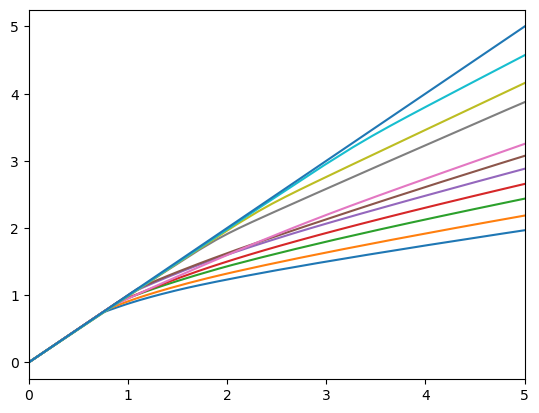

In [7]:
print('Consumption functions across the lifecycle:')
mMin = np.min([LifecycleExample.solution[t].mNrmMin for t in range(LifecycleExample.T_cycle)])
LifecycleExample.unpack('cFunc') # This makes all of the cFuncs accessible in the attribute cFunc
plot_funcs(LifecycleExample.cFunc,mMin,5)

We easily can adjust the parameters to make them time varying as well!

### 2.3 Simulation
We can simulate using Monte Carlo or [Transition Matrices](https://github.com/econ-ark/HARK/tree/master/examples/ConsIndShockModel/IndShockConsumerType_Transition_Matrix_Example.ipynb). These results can be used for in-model regressions or plotting distributions of assets or consumption.

In [8]:
# i) Specify the variables you are interested in
IndShockExample_inf.track_vars = ['aNrm','mNrm','cNrm','pLvl', 'aLvl']
# ii) Initiate simulation
IndShockExample_inf.initialize_sim()
# iii) run it
IndShockExample_inf.simulate()

{'aNrm': array([[0.09150724, 0.09150724, 0.09150724, ..., 0.09150724, 0.09150724,
         0.09150724],
        [0.04107326, 0.09260057, 0.30321897, ..., 0.        , 0.1741739 ,
         0.18590867],
        [0.14250452, 0.0394441 , 0.25449871, ..., 0.12437072, 0.06515257,
         0.13268551],
        ...,
        [0.12226689, 0.09150724, 0.04475635, ..., 0.        , 0.11232641,
         0.09150724],
        [0.18163138, 0.09150724, 0.12925394, ..., 0.09150724, 0.12211008,
         0.        ],
        [0.08928212, 0.18125811, 0.09150724, ..., 0.1775871 , 0.09150724,
         0.02470686]]),
 'mNrm': array([[1.        , 1.        , 1.        , ..., 1.        , 1.        ,
         1.        ],
        [0.99652331, 1.11171385, 1.52952168, ..., 0.83894168, 1.2815233 ,
         1.30477622],
        [1.25305253, 0.99280471, 1.508894  , ..., 1.20937902, 1.06026542,
         1.2294044 ],
        ...,
        [1.17538272, 1.        , 1.17373503, ..., 0.34752116, 1.39942912,
         1.       

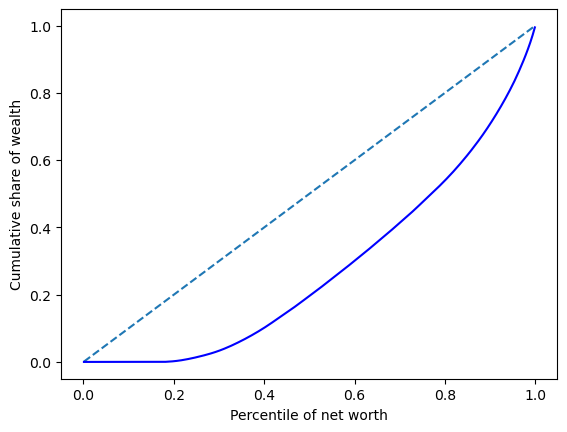

In [20]:
from HARK.utilities import get_lorenz_shares, get_percentiles
pctiles = np.linspace(0.001, 0.999, 200)
sim_Lorenz_points = get_lorenz_shares(IndShockExample_inf.state_now["aLvl"], percentiles=pctiles)
plt.plot(pctiles, pctiles, "--")
plt.plot(pctiles, sim_Lorenz_points, "-b")
plt.xlabel("Percentile of net worth")
plt.ylabel("Cumulative share of wealth")
plt.show(block=False)

# 2. HARK meets SSJ
HARK offers an extreme amount of flexibility solving the heterogeneous block in partial equilibrium. To include the general quilibrium parts, there are multiple options depending on your purpose.

You can use the in-house [`MarketType`](https://github.com/econ-ark/HARK/blob/master/examples/ConsumptionSaving/example_ConsAggShockModel.ipynb) to model your economy in which the agent lives or check out how we implemented [Krusell-Smith](https://github.com/econ-ark/KrusellSmith/blob/master/Code/Python/KrusellSmith.ipynb).

TODAY, we look at the interlinkage of HARK with the [Sequence Space Jacobian Toolbox](https://github.com/shade-econ/sequence-jacobian) you are already familiar with.

The idea is to use HARK for the heterogeneous household part, solve the steady state values and jacobians, plug them in the sequence space toolbox and get all their nice functions for free! This is a way to combine the flexibility of HARK on the heterogeneity part and the fast and user-friendly general equilibrium part from SSJ.

Let's get into an introduction example [here](IndShockConsumerType_HANK.ipynb).

## 3. Why use HARK?
The question might now arrise: Why should I learn a new Toolkit and not stick to SSJ completely.

With HARK you have a lot of flexibility on the heterogeneous agent part! This part is crucial to analyze quantitative responses. You can use off-the-shelf HARK models or adapt them to create your own model, solve it, receive the jacobians and plug them into SSJ!

### 3.1 Targeting liquid asset distribution
Before, we targeted mean assets (SSJ targets mean MPC). But, what about the whole distribution?

HARK gives you the means to tweak your model such that you can match the asset distribution. For instance, Carroll, Slacalek, Tokuoka, White (2017) show that by having small ex-ante hetoerogeneity in discount rates, you can match the Lorenz curve relatively well. Check out a [demonstration](https://github.com/econ-ark/DemARK/blob/master/notebooks/Micro-and-Macro-Implications-of-Very-Impatient-HHs.ipynb) or [replication](https://github.com/econ-ark/DistributionOfWealthMPC) for details.

The result can be seen below.

![Lorenz_DisCount](Lorenzcurve_DiscRate.png)

A recent paper by Carroll, Crawley, Frankovic, Tretvoll matches the intertemporal MPC in addition to the wealth distribution. Those iMPCs are crucial to get the dynamics right. [Auclert et al 2018](https://www.nber.org/papers/w25020) show that households with a high, but below one, MPC consume also more from the transitory income shock in the following periods.

Below is figure one from Carroll et al. With such a heterogeneous agent part in your quantitative HANK model allows you to make serious claims about quantitative changes from interest rate or government spending shocks.

![HAFiscal_Fig](HAFiscal_Fig1.png)

### 3.2 Other HARK agents
There are many more off-the-shelf agents waiting to be used. Including additional features, allows you to analyse other markets as well. Note, that you can solve and simulate them already, BUT the jacobians are not ready yet!

For a list, click [here](https://github.com/econ-ark/HARK/tree/master/HARK/ConsumptionSaving). Below some notable examples which solve problems with discrete choice. For them, the standard `HetBlock` of SSJ is not capable of solving.

#### a) [Portfolio Choice](https://github.com/econ-ark/HARK/blob/master/examples/ConsPortfolioModel/example_ConsPortfolioModel.ipynb)

Using the `PortfolioConsumerType` allows you to add risky assets to a one-asset model. A baseline [Lifecycle and Portfolio choice](https://github.com/econ-ark/REMARK/blob/master/REMARKs/CGMPortfolio.md) model a la Cocco, Gomes, & Maenhout (2005) is already implemented. Depending on your question, you can
- specify a share of risky asset holder exogeneously
- specify an exogeneous probability (a la calvo) with which agents can rebalance their portfolio (see [Luettike 2021](https://www.ralphluetticke.com/publication/aermacro_2020/) for an example)
- solve the share endogeneously with participation costs 
- vary returns by age
- ...

For a life demonstration invite [Mateo](https://mv77.github.io/).

#### b) Search and matching model

[Will](https://github.com/wdu9) combines a HANK with a Search and Match Model. This allows him to endogenize wage and unemployment dynamics.
Invite Will to present once his first draft is ready.


#### c) [Durable Good](https://github.com/AMonninger/DurableConsumerType_REMARK/blob/main/code/python/DurableModel_Notebook.ipynb)      

Using `DurableConsumerType` allows you to solve a household problem with non-durable and durable goods, where the adjustment of the durable stock entails a non-convex cost. This opens doors to analyze business cycle fluctuations of durable good demand, prices, as well as sectoral labor markets.

My JMP uses this agent in a partial and general equilibrium context. I'm happy to present this in the near future.

### 3.3 Build your own Agent
In case your research question requires additional featuers off-the-shelf models do not have, you can add them relatively easy!

As seen above, agents inherit features from other agents. Hence, search for the closest agenttype and replace the parts you want to change.

#### a) Understanding the code
Obviously, the most important thing is to understand the structure of the code. Then you can think about which code to replace and how.
A good starting point is this [notebook](https://github.com/econ-ark/HARK/blob/master/examples/HowWeSolveIndShockConsumerType/HowWeSolveIndShockConsumerType.ipynb) describing how we solve the `IndShockConsumerType`. Then look at the source code ofe other models which build on this one eg [`IndShockRiskyAssetConsumerType`](https://github.com/econ-ark/HARK/blob/master/HARK/ConsumptionSaving/ConsRiskyAssetModel.py)


#### b) Use our tools
We update our toolbox constantly. Hence, there might be something in for your current problem. For many of them exist notebooks to showcase their function.

Useful examples are:
- [DCEGM-Upper-Envelope](https://github.com/econ-ark/DemARK/blob/master/notebooks/DCEGM-Upper-Envelope.ipynb): To solve problems with nonconex value functions due to discrete choices
- [Harmenberg-Aggregation](https://github.com/econ-ark/DemARK/blob/master/notebooks/Harmenberg-Aggregation.ipynb): EXPLANATION
- [DecayInterp](https://github.com/econ-ark/HARK/tree/master/examples/Interpolation/DecayInterp.ipynb): Interpolation with decay for instnace, if there is an analytical limit
- ...





# Conclusion
In this journey you have learned how to use the `IndShockConsumer` and how to use its features in the partial equilibrium case. Next, we have seen how easy it is to connect it to the sequence space toolbox in order to generate the general equilibrium blocks.

The selling point of HARK is its flexibility in the heterogeneous agent blocks. We can allow for features such as ex-ante heterogeneity in discount rates to match the asset distribution and use the resulting jacobians to get IRFs from SSJ. Hence, analysing monetary and fiscal policy responses get more accurate!

In summary, using HARK allows you to introduce the kind of heteroegeneity you need. Therefore, you are not restricted by the tools to answer your questions, but can start with the questions and define your tools after them!

# References
Carroll, C., Slacalek, J., Tokuoka, K., & White, M. N. (2017). The distribution of wealth and the marginal propensity to consume. Quantitative Economics, 8(3), 977-1020.

Cocco, J. F., Gomes, F. J., & Maenhout, P. J. (2005). Consumption and portfolio choice over the life cycle. The Review of Financial Studies, 18(2), 491-533.

# APPENDIX

# List of materials on HARK
1. Calibration (no notebooks)
[Income_calibrations](https://github.com/econ-ark/HARK/tree/master/examples/Calibration/Income_calibrations.py)
[Life_Cycle_example](https://github.com/econ-ark/HARK/tree/master/examples/Calibration/Life_Cycle_example.py)
[SCF_distributions](https://github.com/econ-ark/HARK/tree/master/examples/Calibration/SCF_distributions.py)
[Sabelhaus_Song_var_profiles](https://github.com/econ-ark/HARK/tree/master/examples/Calibration/Sabelhaus_Song_var_profiles.py)
[US_SSA_life_tables](https://github.com/econ-ark/HARK/tree/master/examples/Calibration/US_SSA_life_tables.py)

2. ConsIndShockModel
[Finite Cyclical Test](https://github.com/econ-ark/HARK/tree/master/examples/ConsIndShockModel/Finite Cyclical Test.ipynb)
[IndShockConsumerType](https://github.com/econ-ark/HARK/tree/master/examples/ConsIndShockModel/IndShockConsumerType.ipynb)
[IndShockConsumerType_Jacobian_Example](https://github.com/econ-ark/HARK/tree/master/examples/ConsIndShockModel/IndShockConsumerType_Jacobian_Example.ipynb)
[IndShockConsumerType_Transition_Matrix_Example](https://github.com/econ-ark/HARK/tree/master/examples/ConsIndShockModel/IndShockConsumerType_Transition_Matrix_Example.ipynb)
[KinkedRconsumerType](https://github.com/econ-ark/HARK/tree/master/examples/ConsIndShockModel/KinkedRconsumerType.ipynb)
[PerfForesightConsumerType](https://github.com/econ-ark/HARK/tree/master/examples/ConsIndShockModel/PerfForesightConsumerType.ipynb)

3. ConsPortfolioModel
[example_ConsPortfolioModel](https://github.com/econ-ark/HARK/tree/master/examples/ConsPortfolioModel/example_ConsPortfolioModel.ipynb)
[example_ConsRiskyAssetModel](https://github.com/econ-ark/HARK/tree/master/examples/ConsPortfolioModel/example_ConsRiskyAssetModel.ipynb)
[example_ConsSequentialPortfolioModel](https://github.com/econ-ark/HARK/tree/master/examples/ConsPortfolioModel/example_ConsSequentialPortfolioModel.ipynb)

4. ConsumptionSaving (Outdated)
[example_ConsAggShockModel](https://github.com/econ-ark/HARK/blob/master/examples/ConsumptionSaving/example_ConsAggShockModel.ipynb)
[example_ConsGenIncProcessModel](https://github.com/econ-ark/HARK/blob/master/examples/ConsumptionSaving/example_ConsGenIncProcessModel.ipynb)
[example_ConsIndShock](https://github.com/econ-ark/HARK/blob/master/examples/ConsumptionSaving/example_ConsIndShock.ipynb)
[example_ConsLaborModel](https://github.com/econ-ark/HARK/blob/master/examples/ConsumptionSaving/example_ConsLaborModel.ipynb)
[example_ConsMarkovModel](https://github.com/econ-ark/HARK/blob/master/examples/ConsumptionSaving/example_ConsMarkovModel.ipynb)
[example_ConsMedModel](https://github.com/econ-ark/HARK/blob/master/examples/ConsumptionSaving/example_ConsMedModel.ipynb)
[example_ConsPrefShockModel](https://github.com/econ-ark/HARK/blob/master/examples/ConsumptionSaving/example_ConsPrefShockModel.ipynb)
[example_ConsRepAgentModel](https://github.com/econ-ark/HARK/blob/master/examples/ConsumptionSaving/example_ConsRepAgentModel.ipynb)
[example_ConsRiskyContribModel](https://github.com/econ-ark/HARK/blob/master/examples/ConsumptionSaving/example_ConsRiskyContribModel.py) No notebook
[example_TractableBufferStockModel](https://github.com/econ-ark/HARK/blob/master/examples/ConsumptionSaving/example_TractableBufferStockModel.ipynb)


5. Distributions
[DiscreteDistributionLabeled](https://github.com/econ-ark/HARK/tree/master/examples/Distributions/DiscreteDistributionLabeled.ipynb)
[ExpectedValue](https://github.com/econ-ark/HARK/tree/master/examples/Distributions/ExpectedValue.ipynb)

6. FrameAgentType (WIP)

7. GenIncProcessModel
[GenIncProcessModel](https://github.com/econ-ark/HARK/blob/master/examples/GenIncProcessModel/GenIncProcessModel.ipynb)

8. Gentle-Intro
[Gentle-Intro-To-HARK](https://github.com/econ-ark/HARK/blob/master/examples/Gentle-Intro/Gentle-Intro-To-HARK.ipynb)

9. HowWeSolveIndShockConsumerType
[HowWeSolveIndShockConsumerType](https://github.com/econ-ark/HARK/blob/master/examples/HowWeSolveIndShockConsumerType/HowWeSolveIndShockConsumerType.ipynb)

10. Interpolation
[CubicInterp](https://github.com/econ-ark/HARK/tree/master/examples/Interpolation/CubicInterp.ipynb)
[DecayInterp](https://github.com/econ-ark/HARK/tree/master/examples/Interpolation/DecayInterp.ipynb)

11. Journeys
[Journey_1_PhD](https://github.com/econ-ark/HARK/blob/master/examples/Journeys/Journey_1_PhD.ipynb)
[AzureMachineLearning](https://github.com/econ-ark/HARK/blob/master/examples/Journeys/AzureMachineLearning.ipynb)
[Journey 2 Engineering Background](https://github.com/econ-ark/HARK/blob/master/examples/Journeys/Journey%202%20Engineering%20Background.ipynb)

12. Lifecyclemodel
[EstimationParameters](https://github.com/econ-ark/HARK/blob/master/examples/LifecycleModel/EstimationParameters.py) --> Just a dictionary
[LifecycleModel](https://github.com/econ-ark/HARK/blob/master/examples/LifecycleModel/LifecycleModel.ipynb)


# List of Materials on DemARK
[Alternative-Combos-Of-Parameter-Values](https://github.com/econ-ark/DemARK/blob/master/notebooks/Alternative-Combos-Of-Parameter-Values.ipynb)
[ChangeLiqConstr](https://github.com/econ-ark/DemARK/blob/master/notebooks/ChangeLiqConstr.ipynb)
[Chinese-Growth](https://github.com/econ-ark/DemARK/blob/master/notebooks/Chinese-Growth.ipynb)
[DCEGM-Upper-Envelope](https://github.com/econ-ark/DemARK/blob/master/notebooks/DCEGM-Upper-Envelope.ipynb)
[DiamondOLG](https://github.com/econ-ark/DemARK/blob/master/notebooks/DiamondOLG.ipynb)
[FisherTwoPeriod](https://github.com/econ-ark/DemARK/blob/master/notebooks/FisherTwoPeriod)
[Gentle-Intro-To-HARK-Buffer-Stock-Model](https://github.com/econ-ark/DemARK/blob/master/notebooks/Gentle-Intro-To-HARK-Buffer-Stock-Model)
[Gentle-Intro-To-HARK-PerfForesightCRRA](https://github.com/econ-ark/DemARK/blob/master/notebooks/Gentle-Intro-To-HARK-PerfForesightCRRA)
[Harmenberg-Aggregation](https://github.com/econ-ark/DemARK/blob/master/notebooks/Harmenberg-Aggregation)
[IncExpectationExample](https://github.com/econ-ark/DemARK/blob/master/notebooks/IncExpectationExample)
[KeynesFriedmanModigliani](https://github.com/econ-ark/DemARK/blob/master/notebooks/KeynesFriedmanModigliani)
[LC-Model-Expected-Vs-Realized-Income-Growth](https://github.com/econ-ark/DemARK/blob/master/notebooks/LC-Model-Expected-Vs-Realized-Income-Growth.ipynb)
[LifeCycleModelTheoryVsData](https://github.com/econ-ark/DemARK/blob/master/notebooks/LifeCycleModelTheoryVsData)
[Lucas-Asset-Pricing-Model](https://github.com/econ-ark/DemARK/blob/master/notebooks/Lucas-Asset-Pricing-Model)
[MPC-Out-of-Credit-vs-MPC-Out-of-Income](https://github.com/econ-ark/DemARK/blob/master/notebooks/MPC-Out-of-Credit-vs-MPC-Out-of-Income.ipynb)
[Micro-and-Macro-Implications-of-Very-Impatient-HHs](https://github.com/econ-ark/DemARK/blob/master/notebooks/Micro-and-Macro-Implications-of-Very-Impatient-HHs.ipynb)
[Nondurables-During-Great-Recession](https://github.com/econ-ark/DemARK/blob/master/notebooks/Nondurables-During-Great-Recession.ipynb)
[PerfForesightCRRA-Approximation](https://github.com/econ-ark/DemARK/blob/master/notebooks/PerfForesightCRRA-Approximation.ipynb)
[PerfForesightCRRA-SavingRate](https://github.com/econ-ark/DemARK/blob/master/notebooks/PerfForesightCRRA-SavingRate.ipynb)
[Structural-Estimates-From-Empirical-MPCs-Fagereng-et-al](https://github.com/econ-ark/DemARK/blob/master/notebooks/Structural-Estimates-From-Empirical-MPCs-Fagereng-et-al.ipynb)
[TractableBufferStock-Interactive](https://github.com/econ-ark/DemARK/blob/master/notebooks/TractableBufferStock-Interactive.ipynb)

As in case of the agent-type the more complicated macroeconomic models are the subclasses of the more primitive ones. The subclasses of Market include `CobbDouglasEconomy` and `SmallOpenEconomy`. The main difference between them is that for `CobbDouglasEconomy`, the capital and labour prices are endogenous, while in the (small) open economy class there are set exogenously. Nevertheless, both basic classes enable the aggregate fluctuation in the economy, that is:

\begin{eqnarray*} 
Y_{i,t}  &=& \varepsilon_t(\epsilon_{i,t}p_{i,t}\Theta_t P_t )\\
P_{t+1} &=& P_{t}\Psi_{t+1}\\
\Psi_{t}  &\sim & {N}(1,\sigma_{\Psi})\\
\Theta_t  &\sim &{N}(1,\sigma_{\Theta})\\
\end{eqnarray*}

Therefore, the consumers, which are attributes of such market classes, need to include the aggregate fluctuations of the whole economy in their optimization problem. This is the reason why the `AggShockConsumerType` consumer type class (and their subclasses) must be used to construct the macro-model. 

The subclass of `CobbDouglasEconomy` is `CobbDouglasMarkovEconomy`. In this setting, in the economy there exist an additional aggregate fluctuation, which distribution is given by the finite Markov matrix. 

![HARK structure2](HARK_struct_4.png)